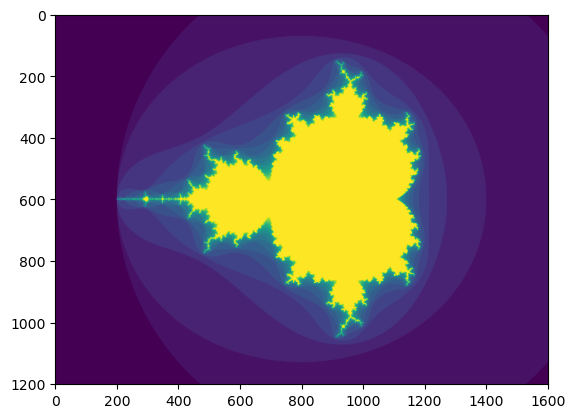

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))

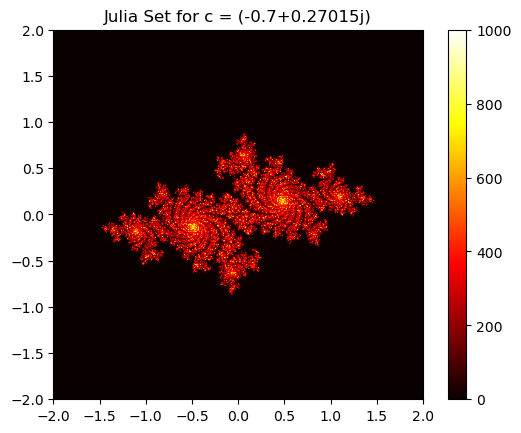

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def julia(c, N=1000, zoom=1, res=500):
    x = np.linspace(-2, 2, res) / zoom
    y = np.linspace(-2, 2, res) / zoom
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.zeros(Z.shape, dtype=int)
    mask = np.ones(Z.shape, dtype=bool)
    for n in range(N):
        Z[mask] = Z[mask] ** 2 + c
        mask = mask & (np.abs(Z) < 2)
        img += mask
    plt.imshow(img, cmap='hot', extent=[-2, 2, -2, 2])
    plt.colorbar()
    plt.title(f'Julia Set for c = {c}')
    plt.show()

julia(c=-0.7 + 0.27015j)


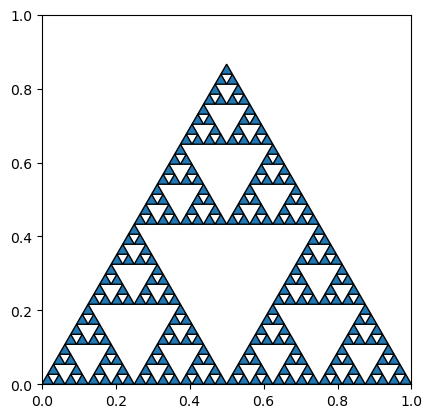

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(ax, vertices, depth):
    if depth == 0:
        triangle = plt.Polygon(vertices, edgecolor='k')
        ax.add_patch(triangle)
    else:
        midpoints = [(vertices[i] + vertices[(i+1) % 3]) / 2 for i in range(3)]
        sierpinski_triangle(ax, [vertices[0], midpoints[0], midpoints[2]], depth - 1)
        sierpinski_triangle(ax, [vertices[1], midpoints[1], midpoints[0]], depth - 1)
        sierpinski_triangle(ax, [vertices[2], midpoints[2], midpoints[1]], depth - 1)

fig, ax = plt.subplots()
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
sierpinski_triangle(ax, vertices, 5)
ax.set_aspect('equal')
plt.show()


ValueError: operands could not be broadcast together with shapes (8,2) (7,2) 

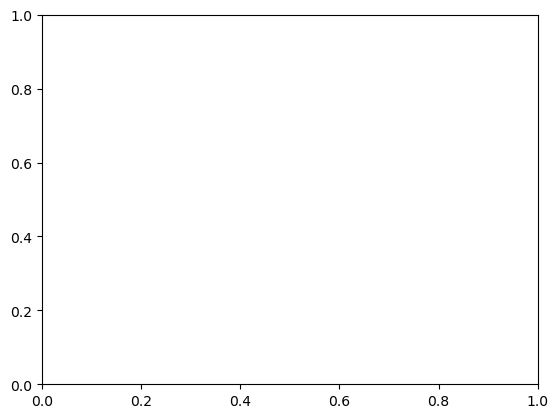

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10):
    def koch_curve(order):
        if order == 0:
            return np.array([[0, 0], [1, 0]])
        else:
            p1 = koch_curve(order-1)
            p2 = p1 / 3
            p3 = p2 + np.array([1/3, 0])
            p4 = p2 + np.array([1/6, np.sqrt(3)/6])
            p5 = 2*p2 + p1[1:]
            return np.concatenate([p2, p3, p4, p5])
    
    p1 = koch_curve(order)
    p2 = p1 @ np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)], [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
    p3 = p1 @ np.array([[np.cos(-2*np.pi/3), -np.sin(-2*np.pi/3)], [np.sin(-2*np.pi/3), np.cos(-2*np.pi/3)]])
    snowflake = np.concatenate([p1, p2, p3]) * scale
    return snowflake

fig, ax = plt.subplots()
points = koch_snowflake(order=4)
ax.plot(points[:, 0], points[:, 1])
ax.set_aspect('equal')
plt.show()


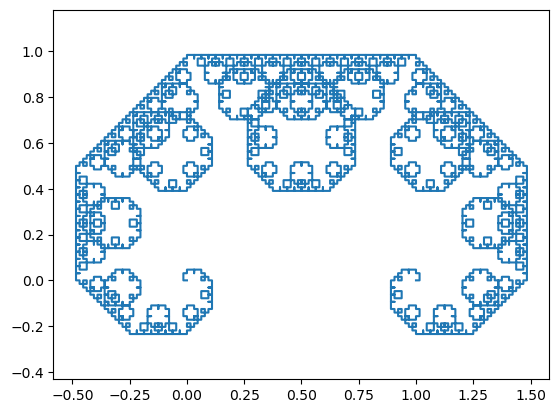

In [5]:
import matplotlib.pyplot as plt

def dragon_curve(n):
    points = [(0, 0), (1, 0)]
    for _ in range(n):
        new_points = []
        for i in range(len(points) - 1):
            x1, y1 = points[i]
            x2, y2 = points[i + 1]
            dx, dy = (x2 - x1) / 2, (y2 - y1) / 2
            mid = (x1 + dx - dy, y1 + dy + dx)
            new_points.append(points[i])
            new_points.append(mid)
        new_points.append(points[-1])
        points = new_points
    return points

points = dragon_curve(12)
x, y = zip(*points)
plt.plot(x, y)
plt.axis('equal')
plt.show()
